In [1]:
import pandas as pd
df = pd.read_csv('../data/curated/full_listing.csv').iloc[:,1:]
remove = [ 'address', 'suburb', 'postcode', 'url', 'loc_address', 'lat', 'lon', 'list_date', 'list_history', 'list_count', 'SA2_NAME_2016', 'SA2', 'lgaregion', 'primary_school_name', 'secondary_school_name', 'pri_lat', 'pri_lon', 'sec_lat', 'sec_lon', 'closest_ed_name', 'ed_lat', 'ed_lon', 'train_stop', 'train_lat', 'train_lon']
df = df.drop(remove, axis=1)
df.head()

,bed,bath,car,type,weekly_rent,income_earner,income_median_age,income_median,income_mean,income_top_10_pct,...,primary_distance,primary_duration,secondary_distance,secondary_duration,ed_distance,ed_duration,train_distance,train_duration,melb_distance,melb_duration
0,3,1,2,AUF,525.0,14501.0,47.0,61520.0,101491.0,42.5,...,898,121,1272,167,6019,724,1514,189,14572,1508
1,4,2,3,AUF,850.0,14501.0,47.0,61520.0,101491.0,42.5,...,1110,131,2274,248,6690,794,1534,197,13778,1423
2,2,1,1,AUF,395.0,14501.0,47.0,61520.0,101491.0,42.5,...,604,104,2812,335,6947,818,464,87,13262,1372
3,3,2,2,House,580.0,14501.0,47.0,61520.0,101491.0,42.5,...,878,74,2866,281,5685,629,1619,190,14435,1464
4,2,1,1,House,400.0,14501.0,47.0,61520.0,101491.0,42.5,...,1089,163,2615,313,7650,924,806,114,12502,1288


In [2]:
df.type = pd.Categorical(df.type)
df['type_code'] = df.type.cat.codes

In [3]:
df = df.dropna()

In [29]:
df

,bed,bath,car,type,weekly_rent,income_earner,income_median_age,income_median,income_mean,income_top_10_pct,...,primary_duration,secondary_distance,secondary_duration,ed_distance,ed_duration,train_distance,train_duration,melb_distance,melb_duration,type_code
0,3,1,2,AUF,525.0,14501.0,47.0,61520.0,101491.0,42.5,...,121,1272,167,6019,724,1514,189,14572,1508,0
1,4,2,3,AUF,850.0,14501.0,47.0,61520.0,101491.0,42.5,...,131,2274,248,6690,794,1534,197,13778,1423,0
2,2,1,1,AUF,395.0,14501.0,47.0,61520.0,101491.0,42.5,...,104,2812,335,6947,818,464,87,13262,1372,0
3,3,2,2,House,580.0,14501.0,47.0,61520.0,101491.0,42.5,...,74,2866,281,5685,629,1619,190,14435,1464,1
4,2,1,1,House,400.0,14501.0,47.0,61520.0,101491.0,42.5,...,163,2615,313,7650,924,806,114,12502,1288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41973,3,1,1,unknown,310.0,5883.0,46.0,52984.0,66049.0,31.9,...,648,35223,1742,43232,2084,36764,1846,59224,3379,4
41974,3,1,2,unknown,550.0,2109.0,52.0,38638.0,49593.0,33.0,...,528,45812,2321,47913,2722,45628,2512,80857,4432,4
41975,3,2,4,unknown,600.0,2109.0,52.0,38638.0,49593.0,33.0,...,69,57736,2872,59837,3273,57552,3063,92781,4983,4
41976,5,2,3,unknown,640.0,3572.0,46.0,52033.0,61565.0,28.3,...,573,38832,1992,36701,2144,35656,2053,61299,3249,4


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

/Users/nhe/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
x = df.drop(['type', 'weekly_rent'], axis=1)
y = df['weekly_rent']

In [6]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [7]:
regressor.fit(x, y)

RandomForestRegressor(n_estimators=500, random_state=0)

In [28]:
x.columns

Index(['bed', 'bath', 'car', 'income_earner', 'income_median_age',
       'income_median', 'income_mean', 'income_top_10_pct', 'population_total',
       'population_children', 'population_prime_working', 'population_elderly',
       'population_early_working', 'population_mature_working',
       'secondary_school_rank', 'secondary_school_cohort',
       'proj_population_total', 'proj_population_children',
       'proj_population_early_working', 'proj_population_prime_working',
       'proj_population_mature_working', 'proj_population_elderly',
       'train_n_lines', 'primary_distance', 'primary_duration',
       'secondary_distance', 'secondary_duration', 'ed_distance',
       'ed_duration', 'train_distance', 'train_duration', 'melb_distance',
       'melb_duration', 'type_code'],
      dtype='object')

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

<BarContainer object of 34 artists>

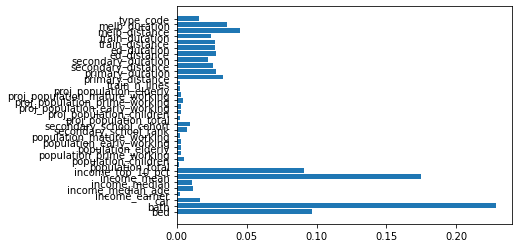

In [17]:
plt.barh(x.columns, regressor.feature_importances_)

In [18]:
x.columns

Index(['bed', 'bath', 'car', 'income_earner', 'income_median_age',
       'income_median', 'income_mean', 'income_top_10_pct', 'population_total',
       'population_children', 'population_prime_working', 'population_elderly',
       'population_early_working', 'population_mature_working',
       'secondary_school_rank', 'secondary_school_cohort',
       'proj_population_total', 'proj_population_children',
       'proj_population_early_working', 'proj_population_prime_working',
       'proj_population_mature_working', 'proj_population_elderly',
       'train_n_lines', 'primary_distance', 'primary_duration',
       'secondary_distance', 'secondary_duration', 'ed_distance',
       'ed_duration', 'train_distance', 'train_duration', 'melb_distance',
       'melb_duration', 'type_code'],
      dtype='object')

In [19]:
regressor.feature_importances_

array([0.09652554, 0.2281775 , 0.01690918, 0.00255287, 0.01147801,
       0.01087317, 0.17482904, 0.09134151, 0.00161321, 0.00544682,
       0.00312317, 0.00333896, 0.00264756, 0.00246183, 0.00716118,
       0.00918214, 0.00199409, 0.00281665, 0.00268723, 0.0041678 ,
       0.0032049 , 0.00230012, 0.00262098, 0.03318483, 0.02837151,
       0.02568651, 0.02241116, 0.02771579, 0.02704347, 0.02703596,
       0.02443321, 0.04489822, 0.03613147, 0.01563444])

In [20]:
pd.DataFrame([x.columns, regressor.feature_importances_]).to_csv('../plots/rf_importance.csv')

In [21]:
predictions = regressor.predict(x)

In [22]:
gt = y.tolist()

In [23]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(gt, predictions),4))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(gt, predictions),4))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(gt, predictions)),4))
mape = np.mean(np.abs((gt - predictions) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 4))
print('Accuracy:', round(100*(1 - mape), 4))
print('R-squared:', round(metrics.r2_score(gt, predictions),4))

Mean Absolute Error (MAE): 20.9291
Mean Squared Error (MSE): 1963.5633
Root Mean Squared Error (RMSE): 44.3121
Mean Absolute Percentage Error (MAPE): 4.2405
Accuracy: 95.7595
R-squared: 0.9424


In [27]:
with open('../models/rf_regressor', 'wb') as f:
    cPickle.dump(regressor, f)

In [26]:
import _pickle as cPickle